In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df = pd.read_csv("./anime.csv")

In [8]:
# sorted_ = df[["Name", "Score", "Genres","Episodes", "Ranked", "Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", "Dropped", "Plan to Watch"]]
sorted_ = df.drop(["English name", "Japanese name", "Aired" ,"Premiered", "Type", 
                    "Producers", "Licensors", "Studios", "Source", "Duration", "Rating"], axis=1)
sorted_ = sorted_[(sorted_["Score"] != "Unknown")& (sorted_["Episodes"] != "Unknown")& (sorted_["Ranked"] != "Unknown")]
sorted_["Score-10"] = sorted_["Score-10"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-9"] = sorted_["Score-9"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-8"] = sorted_["Score-8"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-7"] = sorted_["Score-7"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-6"] = sorted_["Score-6"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-5"] = sorted_["Score-5"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-4"] = sorted_["Score-4"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-3"] = sorted_["Score-3"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-2"] = sorted_["Score-2"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-1"] = sorted_["Score-1"].apply(lambda x: 0.0 if x == "Unknown" else float(x))

In [9]:
sorted_["all_score"] = sorted_["Score-10"] + sorted_["Score-9"] + sorted_["Score-8"] + sorted_["Score-7"]+ \
                    sorted_["Score-6"] + sorted_["Score-5"] + sorted_["Score-4"] + sorted_["Score-3"] + \
                    sorted_["Score-2"] + sorted_["Score-1"]
sorted_["positive"] = (sorted_["Score-10"]+ sorted_["Score-9"]) / sorted_["all_score"]
sorted_["negative"] = (sorted_["Score-1"]+ sorted_["Score-2"]+ sorted_["Score-3"]+ sorted_["Score-4"]+ sorted_["Score-5"]+ sorted_["Score-6"]) / sorted_["all_score"]
sorted_["NPS"] = sorted_["positive"] - sorted_["negative"]
sorted_.drop(["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "positive", "negative", "all_score"], 
           axis=1, inplace=True)

In [10]:
sorted_

,MAL_ID,Name,Score,Genres,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,28.0,39,1251960,61971,105808,718161,71513,26678,329800,0.584134
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,159.0,518,273145,1174,4143,208333,1935,770,57964,0.438269
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,266.0,201,558913,12944,29113,343492,25465,13925,146918,0.353624
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,2481.0,1467,94683,587,4300,46165,5121,5378,33719,-0.086254
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,3710.0,4369,13224,18,642,7314,766,1108,3394,-0.217120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,4,5461.0,3814,18161,72,617,6978,118,62,10386,-0.349436
17505,47402,Heikousen,7.52,"Music, Romance",1,1517.0,10869,832,27,17,549,8,1,257,0.202864
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",1,4382.0,11973,540,8,51,168,18,2,301,-0.068376
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",1,10760.0,4398,13070,90,1183,8196,119,202,3370,-0.749838


In [11]:
normalized_df = pd.DataFrame(data=sorted_[["Score","Episodes", "Ranked", "NPS"]])
x = normalized_df.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df

,0,1,2,3
0,2.469500,0.300379,-1.722704,2.800866
1,2.036527,-0.253147,-1.681669,2.339425
2,1.869999,0.300379,-1.648152,2.071652
3,0.793118,0.300379,-0.954319,0.680112
4,0.471164,0.876047,-0.569343,0.266120
...,...,...,...,...
10990,0.038191,-0.186724,-0.020855,-0.152458
10991,1.070664,-0.253147,-1.256285,1.594727
10992,0.304635,-0.253147,-0.358844,0.736667
10993,-1.937942,-0.253147,1.639019,-1.419118


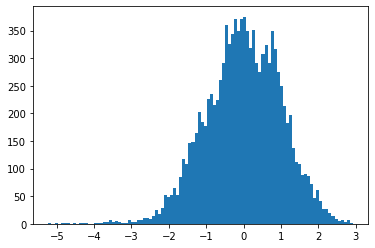

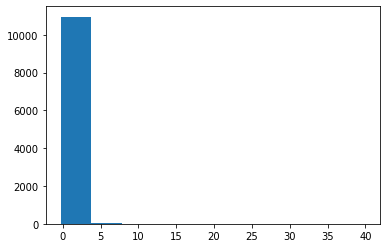

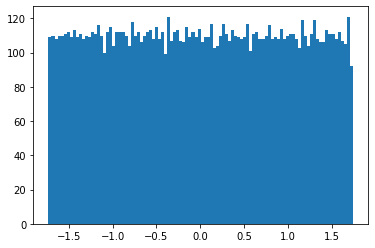

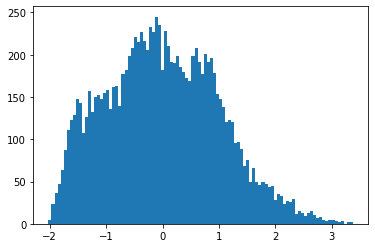

In [15]:
plt.hist(normalized_df[0], bins=100)
plt.show()
plt.hist(normalized_df[1], bins=10)
plt.show()
plt.hist(normalized_df[2], bins=100)
plt.show()
plt.hist(normalized_df[3], bins=100)
plt.show()

In [20]:
# Определяем модель
normalized_df = normalized_df.drop(['Clusters'], axis=1)
dbscan = DBSCAN(eps=0.05,
    min_samples=20,)

# Обучаем
dbscan.fit(normalized_df)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=4).fit(normalized_df)
pca_3d = pca.transform(normalized_df)

In [21]:
normalized_df['Clusters'] = dbscan.labels_

In [22]:
normalized_df[(normalized_df["Clusters"] != -1)]

,0,1,2,3,Clusters
20,0.992951,-0.253147,-1.185806,1.098395,0
26,1.115072,-0.253147,-1.293874,1.189545,0
27,1.792286,-0.253147,-1.627165,2.046197,7
34,0.604386,-0.253147,-0.727218,0.558703,0
43,0.071496,-0.009595,-0.079432,-0.033590,4
...,...,...,...,...,...
10974,1.026257,-0.253147,-1.214937,1.108278,0
10984,0.426756,-0.253147,-0.527369,0.450539,0
10985,0.404552,-0.253147,-0.491346,0.288856,0
10988,-0.972079,-0.253147,1.150987,-1.162385,6


In [23]:
normalized_df['Clusters'].unique()

array([-1,  0,  7,  4,  1,  5, 12,  2,  3, 13,  8, 10,  6,  9, 11],
      dtype=int64)

In [ ]:
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
        
        
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')


plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()